
# Задание к финальному проекту по блоку классического ML

Работаем с [данными](https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv) сервиса проката велосипедов в Корее за год.

Описание данных:
- Date - дата;
- Rented Bike Count - сколько велосипедов было взято в прокат, целевая переменная;
- Hour - час дня;
- Temperature - температура воздуха в градусах Цельсия;
- Humidity - влажность воздуха;
- Wind Speed - скорость ветра в м/с;
- Visibility - мера различимости объектов на расстоянии в 10 метров;
- Dew point temperature -  температура, зарегистрированная в начале дня, в градусах Цельсия;
- Solar Radiation - интенсивность солнечного света;
- Rainfall - количество осадков в мм;
- Snowfall - количество выпавшего снега в мм;
- Seasons - время года;
- Holiday - является ли день праздничным;
- Functioning Day - маркер, работал ли сервис проката в указанное время.

**Цель работы**: изучить данные и выявить факторы влияющие на спрос велосипедов.

**Задачи**:  
1) Провести предобработку данных: проверить данные на наличие выбросов, ошибочных значений, пропусков, дубликатов и некорректных типов.  
2) Провести EDA: реализовать все уровни анализа (одномерные/многомерные) с использованием визуализаций, изучить распределения и взаимосвязь признаков.  
3) Подготовить данные для построения модели (кодирование признаков, масштабирование, разбиение выборки на обучающую и тестовую).  
4) Реализовать базовую регрессионную модель прогнозирования количества велосипедов, взятых в прокат.  
5) При помощи инструментов Feature Selection и подбора гиперпараметров подобрать наилучшую прогнозную модель по adjusted R2 (основная метрика) и RMSE.

Работа должна быть оформлена в виде аналитического отчёта, каждый этап должен сопровождаться выводами.

Обязательный критерий: добиться adjusted R2 не менее 85%.



##1. Загрузка и подготовка данных

Установка phik для последующего проведения анализа

In [ ]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.5 MB/s eta 0:00:00


Импортирование нужных библиотек, загрузка данных с применением encoding = 'cp1251' для чтения специальных символов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv'
df = pd.read_csv(url, encoding='cp1251')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Посмотрим на значения, когда прокат не работал

In [ ]:
print((df['Functioning Day'] == 'No').sum(),'часов не работал прокат')

df_filtered = df[['Rented Bike Count', 'Functioning Day']]

filtered_result = df_filtered.loc[df_filtered['Functioning Day'] == 'No']
filtered_result['Rented Bike Count'].unique()
print(filtered_result)

295 часов не работал прокат
      Rented Bike Count Functioning Day
3144                  0              No
3145                  0              No
3146                  0              No
3147                  0              No
3148                  0              No
...                 ...             ...
8251                  0              No
8252                  0              No
8253                  0              No
8254                  0              No
8255                  0              No

[295 rows x 2 columns]


Как и ожидалось, целевая переменная равна нулю. Удалим эти значения, т.к. они не информативны для анализа и добавят искажения для прогнозирования проката, т.к. несмотря на другие факторы в эти дни целевая переменная будет равна нулю и смещать среднее в меньшую сторону.

In [ ]:
df = df[df['Functioning Day'] != 'No']
df = df.drop('Functioning Day', axis=1)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


Следующим шагом необходимо преобразовать временной ряд Date. Разобъём его на отдельные признаки - год, месяц, день месяца, день недели.


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek
df = df.drop('Date', axis=1)
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,year,month,day,day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30,4
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30,4
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30,4
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30,4


Данные загружены, удалены лишние строки, временные переменные приведены к соответствующему формату

##2. EDA

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,day,day_of_week
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,2017.912109,6.438984,15.840992,3.009687
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,0.283154,3.452362,8.767785,2.008583
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,2017.000000,1.000000,1.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,2018.000000,3.000000,8.000000,1.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,2018.000000,6.000000,16.000000,3.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,2018.000000,9.000000,23.000000,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,2018.000000,12.000000,31.000000,6.000000


Обратим внимание, что по году минимальное значение 2017, максимальное 2018. Этот признак не информативен, поэтому его можно удалить и не учитывать в анализе

In [ ]:
df = df.drop('year', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   object 
 11  Holiday                    8465 non-null   object 
 12  month                      8465 non-null   int32  
 13  day                        8465 non-null   int32  
 1

Проверим датасет на наличие дубликатов

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, month, day, day_of_week]
Index: []


В датафрейме нет пропущенных значений и дубликаторв, есть категориальные признаки, которые необходимо будет закодировать перед построением моделей.

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'month', 'day', 'day_of_week'],
      dtype='object')

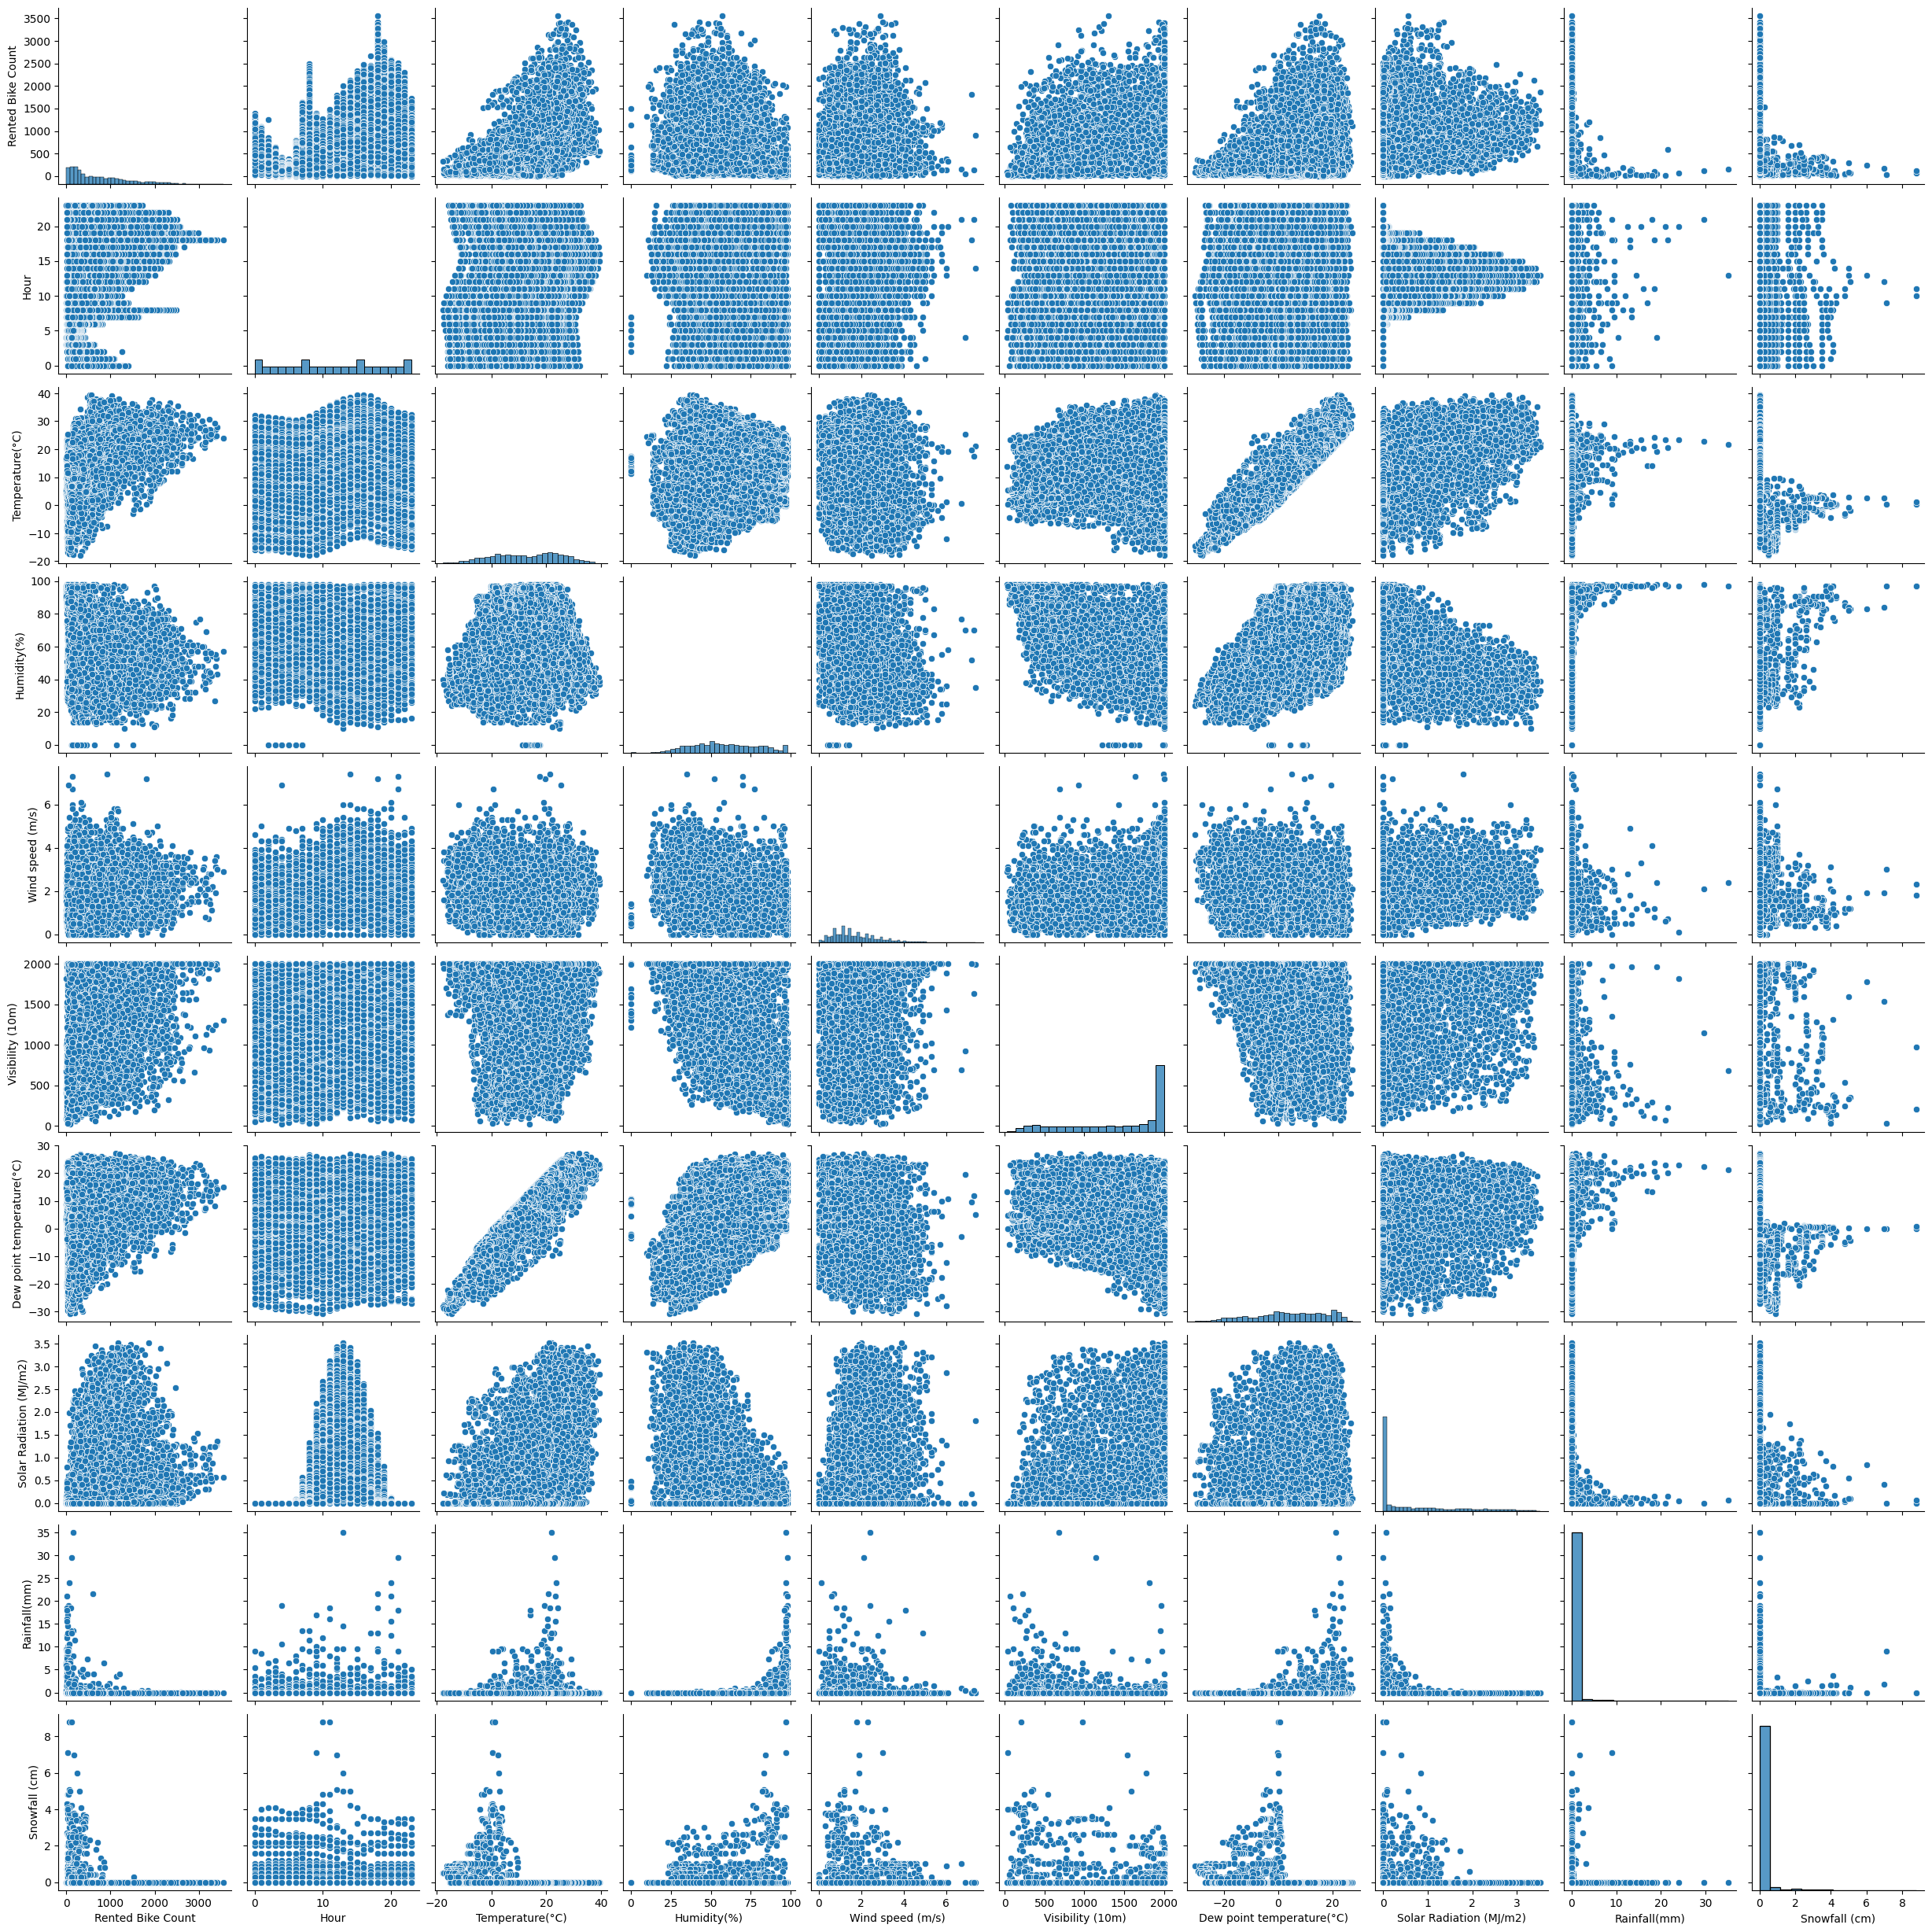

In [ ]:
df_count_var = df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday']]

sns.pairplot(df_count_var)



<br><br>
Можно обратить внимание, что распределения признаков погодных условий имеют тяжелый хвост, это может быть связано с выбросами, посмотрим поподробнее на эти переменные

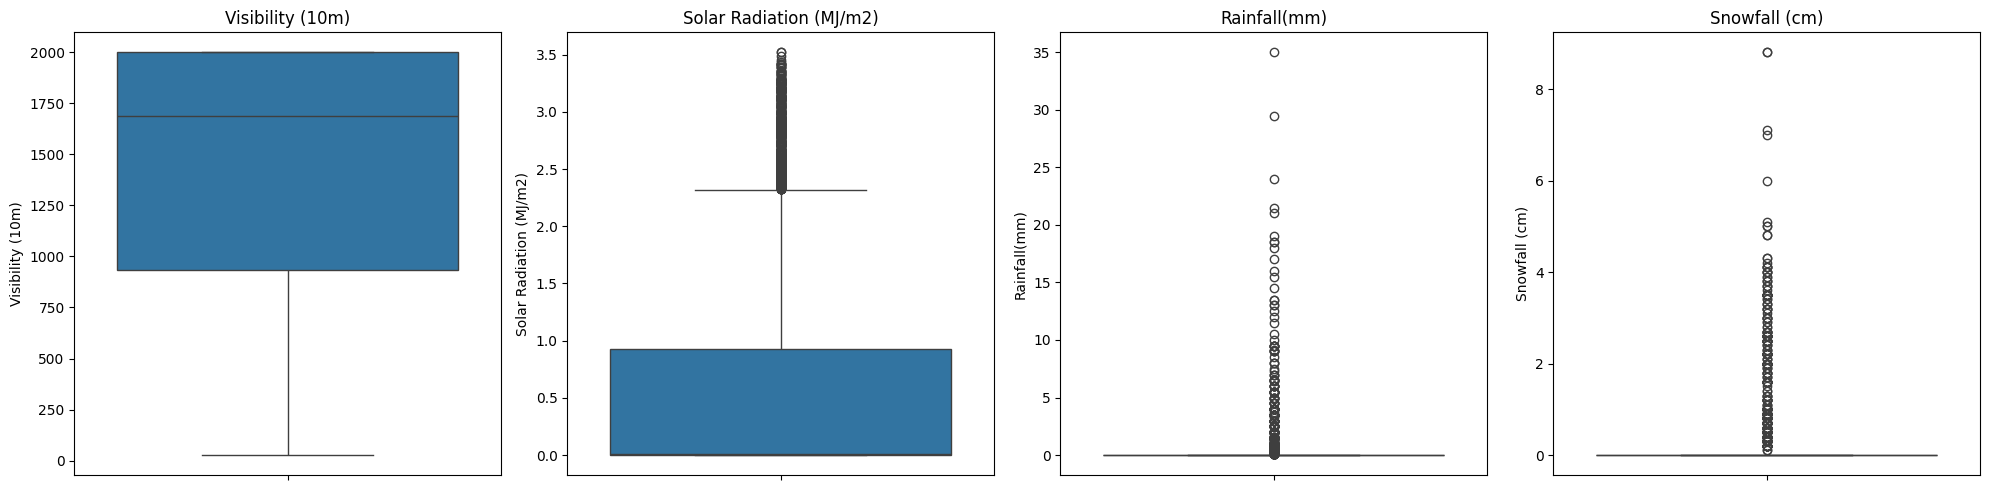

In [ ]:
selected_features = ['Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
num_selected_features = len(selected_features)
fig, axes = plt.subplots(1, num_selected_features, figsize=(num_selected_features * 5, 5))
for i, feature in enumerate(selected_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()

Видно, что признаки Rainfall и Snowfall практически все сосредоточены у нуля. Логичным решением будет заменить эти переменные одним признаком есть осадки/нет осадков.

In [ ]:
df['Precipitation'] = ((df['Rainfall(mm)'] > 0) | (df['Snowfall (cm)'] > 0)).astype(int) # Проверка: отчасти верно, но если, например, рассматривать график осадков, то
df = df.drop(['Rainfall(mm)', 'Snowfall (cm)'], axis=1)                                  # весомая часть значений будет просто "сплюснута" в диапазоне 1 - 14, которые тоже стоит учитывать.
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Holiday,month,day,day_of_week,Precipitation
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday,12,1,4,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday,12,1,4,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,Winter,No Holiday,12,1,4,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,Winter,No Holiday,12,1,4,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,Winter,No Holiday,12,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,Autumn,No Holiday,11,30,4,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,Autumn,No Holiday,11,30,4,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,Autumn,No Holiday,11,30,4,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,Autumn,No Holiday,11,30,4,0


Посмотрим на зависимости между факторами

<Axes: >

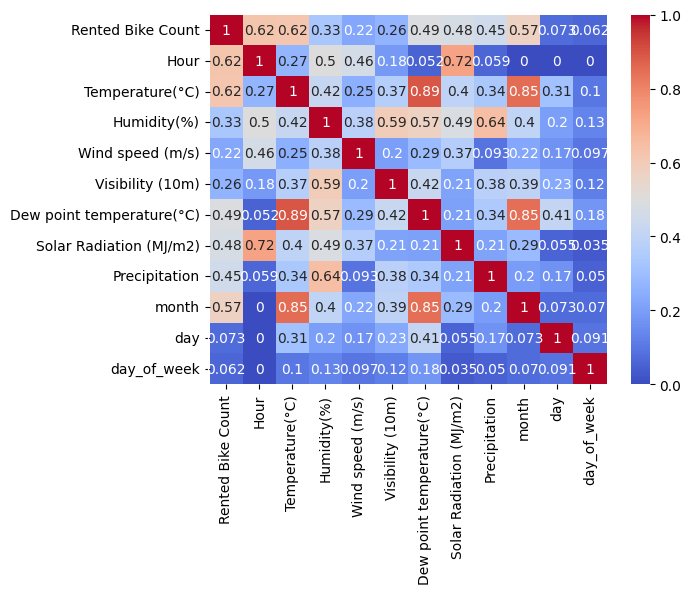

In [ ]:
k = df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Precipitation', 'month', 'day', 'day_of_week']].phik_matrix(interval_cols=['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Precipitation', 'month', 'day', 'day_of_week'])

sns.heatmap(k, annot=True, cmap='coolwarm')

Логично, что высокая корреляция наблюдается между температурой в начале дня, температурой воздуха и месяцем, что очевидно, т.к. температура меняется с месяцами. А также между часом дня и интенсивностью солнечного света. Помимо этого, видим, что с целевой переменной среднюю корреляцию имеют час дня и интенсивность солнечного света, необходимо будет применить регуляризацию, чтобы избавиться от мультиколлинеарности.

Посмотрим на распределение среднего значения целевой переменной по временным признакам

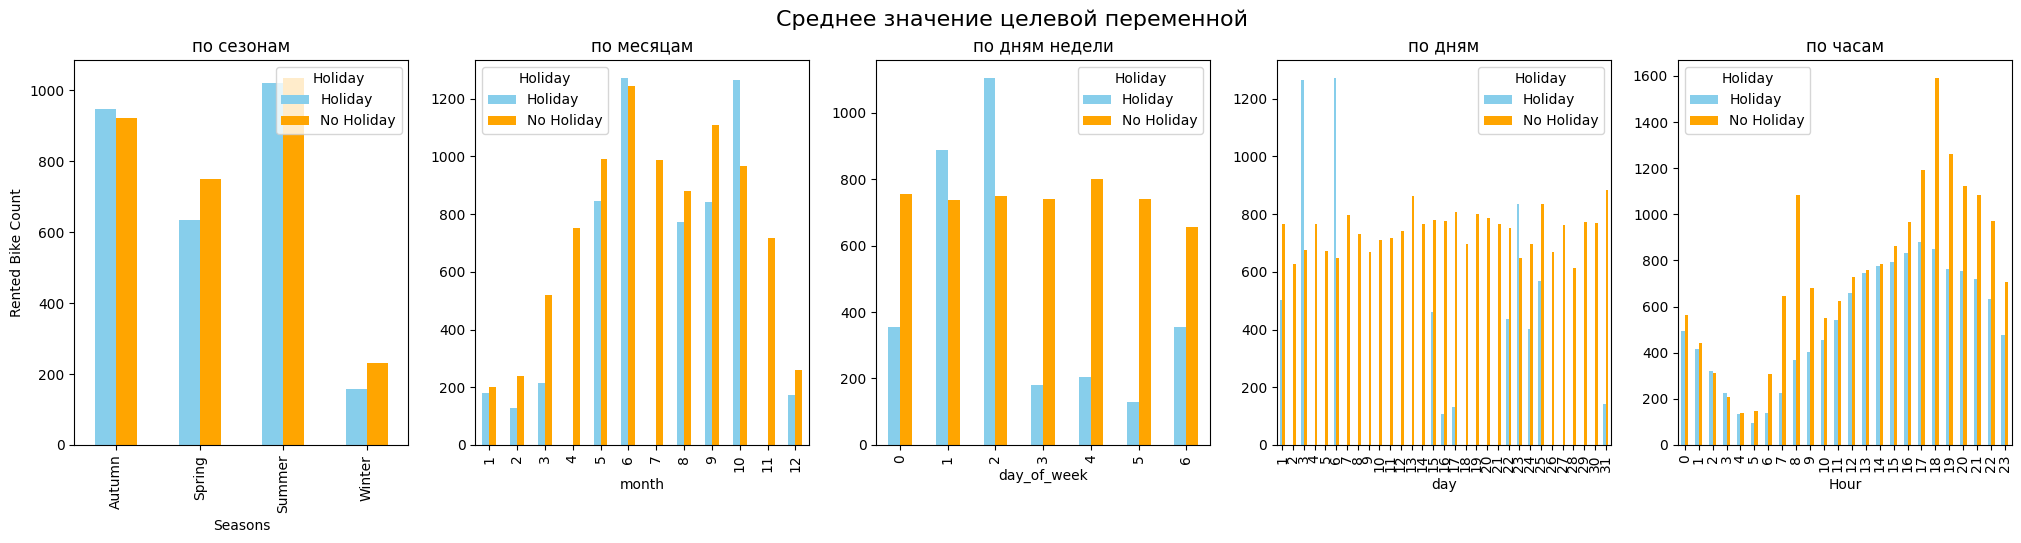

In [ ]:
by_seasons = df.groupby(['Seasons', 'Holiday'])['Rented Bike Count'].mean().unstack()
by_month = df.groupby(['month', 'Holiday'])['Rented Bike Count'].mean().unstack()
by_day_of_week = df.groupby(['day_of_week', 'Holiday'])['Rented Bike Count'].mean().unstack()
by_day = df.groupby(['day', 'Holiday'])['Rented Bike Count'].mean().unstack()
by_hour = df.groupby(['Hour', 'Holiday'])['Rented Bike Count'].mean().unstack()

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

by_seasons.plot(kind='bar', ax=axs[0], color=['skyblue', 'orange'])
axs[0].set_title('по сезонам')
axs[0].set_ylabel('Rented Bike Count')

by_month.plot(kind='bar', ax=axs[1], color=['skyblue', 'orange'])
axs[1].set_title('по месяцам')

by_day_of_week.plot(kind='bar', ax=axs[2], color=['skyblue', 'orange'])
axs[2].set_title('по дням недели')

by_day.plot(kind='bar', ax=axs[3], color=['skyblue', 'orange'])
axs[3].set_title('по дням')

by_hour.plot(kind='bar', ax=axs[4], color=['skyblue', 'orange'])
axs[4].set_title('по часам')

fig.suptitle('Среднее значение целевой переменной', fontsize=16)
plt.show()

Можно отменить, что самый высокий спрос на велосипеды наблюдается летом и осенью вне зависимости от праздников. <br><br> По дням недели наблюдается стабильный ежедневный спрос в рабочие дни и низкий спрос по будням в праздничные. Также видно, что в рабочие дни повышенный спрос наблюдается в утренние и вечерние часы, что говорит о том, что чаще прокатом пользуются рабочие по пути на работу и обратно. <br><br> По дню целевая переменная распределена равномерно и фактор дня месяца имеет низкую корреляцию с целевой переменной, поэтому удалим его из модели

In [ ]:
df = df.drop('day', axis=1)

##3. Построение моделей

Разбиваем датасет на тренировочную и тестовую выборки.


In [ ]:
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday', 'month', 'day_of_week',
       'Precipitation']]
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (6348, 12) (6348,)
Test: (2117, 12) (2117,)


Реализуем базовую модель линейной регрессии

Кодирование категориальных признаков

In [ ]:
X_train_cod = pd.get_dummies(X_train, columns=['Seasons', 'Holiday'], drop_first=True)
X_test_cod = pd.get_dummies(X_test, columns=['Seasons', 'Holiday'], drop_first=True)


Стандартизация данных

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cod)
X_test_scaled = scaler.transform(X_test_cod)

####Построение базовой модели

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")



n_train = X_train.shape[0]
n_test = X_test.shape[0]
k = X_train.shape[1]

adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - k - 1)
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1)) / (n_test - k - 1)

print(f"Adjusted train R^2: {adjusted_r2_train}")
print(f"Adjusted test R^2: {adjusted_r2_test}")

Train R^2: 0.5414604791232176
Test R^2: 0.5492994301163697
Adjusted train R^2: 0.5405918959739641
Adjusted test R^2: 0.5467288945466913


Метрика R2 относительно низкая, попробуем подорбать лучшие параметры с помощью пайплайна и grid_search.

####Пайплайн модели регресси с подобром лучших параметров GreedSearch

Создаём пайплайн со стандартизацией, кодированием категориальных признаков OneHotEncoder и подбором лучшей степени полинома, alpha и l1_ratio для Elastic Net регуяризации модели регрессии:

In [ ]:
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler()), make_column_selector(dtype_include=np.number)),
    (make_pipeline(OneHotEncoder(drop='first')), make_column_selector(dtype_include=object))
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('elasticnet', ElasticNet())

])

param_grid = {
    'poly__degree': [1, 2, 3],
    'elasticnet__alpha': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
    'elasticnet__l1_ratio': [0, 0.25, 0.5, 0.75, 1]

}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', error_score="raise")
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Лучшая метрика (R^2) на обучающем наборе данных:", grid_search.best_score_) # Проверка: неплохой результат


Best Parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 1, 'poly__degree': 3}
Лучшая метрика (R^2) на обучающем наборе данных: 0.8256248531283547


In [ ]:
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
adjusted_train_r2 = 1 - ((1 - train_r2) * (n_train - 1)) / (n_train - k - 1)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=7, scoring='r2')
adjusted_cross_val_r2 = 1 - ((1 - np.mean(cross_val_r2)) * (n_train - 1)) / (n_train - k - 1)
cross_val_rmse = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))

print("Adjusted R2 на тренировочной выборке:", adjusted_train_r2)
print("RMSE на тренировочной выборке:", train_rmse)
print("Adjusted R2 на кросс-валидации:", cross_val_r2.mean())
print("RMSE на кросс-валидации::", cross_val_rmse.mean())

Adjusted R2 на тренировочной выборке: 0.8480049012864939
RMSE на тренировочной выборке: 251.93880488668086
Adjusted R2 на кросс-валидации: 0.8265823389967439
RMSE на кросс-валидации:: 268.60793015596613


In [ ]:
y_pred_test = grid_search.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - ((1 - r2_test) * (n_train - 1)) / (n_train - k - 1)
print("Adjusted R2 на тестовой выборке:", r2_test)

Adjusted R2 на тестовой выборке: 0.8215470726822482


Уже лучше, но по-прежнему ниже целевого показателя 0.85

Посмотрим на остатки

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

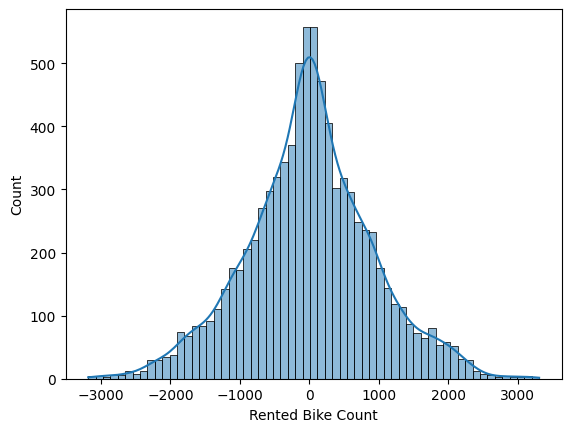

In [ ]:
y_pred = np.concatenate((y_train, y_test))
sns.histplot((y-y_pred), kde=True)

Остатки распределены нормально, что говорит о хорошем качестве построения модели. Попробуем повысить метрику с помощью ансамбля градиентный бустинг

###Ансамбль GradientBoosting

Используем тот же preprocessor для предобработки данных и создаздим пайплайн с использованием greedsearch для поиска лучших параметров градиентного бустинга

In [ ]:
gb_regressor = GradientBoostingRegressor(random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', gb_regressor)
])

param_grid = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_r2 = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R-squared:", best_r2)

Best Parameters: {'gb__learning_rate': 0.2, 'gb__n_estimators': 300}
Best R-squared: 0.9258454979834078


In [ ]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
adjusted_train_r2 = 1 - ((1 - train_r2) * (n_train - 1)) / (n_train - k - 1)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=7, scoring='r2')
adjusted_cross_val_r2 = 1 - ((1 - np.mean(cross_val_r2)) * (n_train - 1)) / (n_train - k - 1)
cross_val_rmse = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=7, scoring='neg_mean_squared_error'))

print("Adjusted R2 на тренировочной выборке:", adjusted_train_r2)
print("RMSE на тренировочной выборке:", train_rmse)
print("Adjusted R2 на кросс-валидации:", cross_val_r2.mean())
print("RMSE на кросс-валидации::", cross_val_rmse.mean())

Adjusted R2 на тренировочной выборке: 0.9547632315400401
RMSE на тренировочной выборке: 137.44408661302612
Adjusted R2 на кросс-валидации: 0.9272212098201982
RMSE на кросс-валидации:: 174.10138639215168


In [ ]:
кy_pred_test = grid_search.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - ((1 - r2_test) * (n_train - 1)) / (n_train - k - 1)
print("Adjusted R2 на тестовой выборке:", r2_test)

Adjusted R2 на тестовой выборке: 0.8215470726822482


Остатки:

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

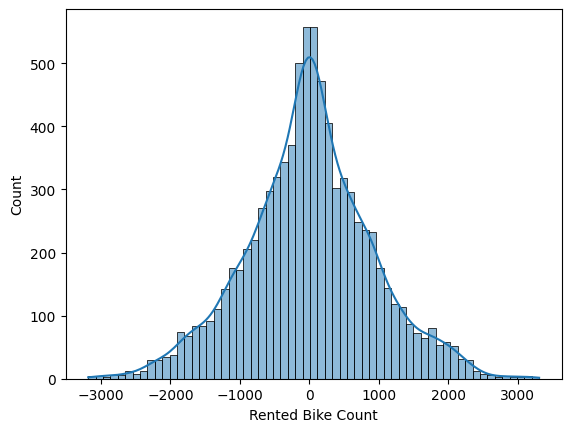

In [ ]:
y_pred = np.concatenate((y_train, y_test))
sns.histplot((y-y_pred), kde=True)

Остатки распределены нормально, итоговая метрика на тестовой выборке выросла до 0.917 <br><br> Использование пайплайнов с предобработкой данных и greedsearch позволили подобрать лучшие параметры без созданиния большого количества разных моделй. <br><br> Использование ансамбля GradientBoosting показало лучшее качество r2 = 0.917, чем полиномиальная модель 3 степени с r2 = 0.82.